In [ ]:
! pip install -U backtrader

In [9]:
# Strategy KD

from datetime import datetime
import backtrader
import pandas

def Function_For_Build_KD_Object(KD_Period):
    
    
    class Strategy_KD_Object(backtrader.Strategy):
        
        def __init__(self):
    
            self.data_open = self.datas[0].open
            self.data_high = self.datas[0].high
            self.data_low = self.datas[0].low
            self.data_close = self.datas[0].close
            self.data_volume = self.datas[0].volume  
            
            self.RSV_Value = 0
            self.K_Value = 50
            self.D_Value = 50            
            
        def next(self):
            
            def Function_Cauculate_KD (KD_Period) :
                
                Highest_Price =  self.data_high[0]
                Lowest_Price =  self.data_low[0]
                
                for Day in range(0, -KD_Period, -1):
                    
                    if self.data_high[Day] > Highest_Price :
                        Highest_Price = self.data_high[Day]

                    if self.data_low[Day] < Lowest_Price :
                        Lowest_Price = self.data_low[Day]
                        
                RSV_Value = 100 * (self.data_close[0] - Lowest_Price) / (Highest_Price - Lowest_Price)
                
                self.K_Value = (self.K_Value * (2/3)) + (RSV_Value * (1/3))
                self.D_Value = (self.D_Value * (2/3)) + (self.K_Value * (1/3))
                
           
            Function_Cauculate_KD(KD_Period)
            
            #self.buy()
            #self.sell()
            #https://www.backtrader.com/docu/order-creation-execution/order-creation-execution/

            if self.K_Value > self.D_Value:
                self.buy()
                print("buy")
                
            if self.K_Value < self.D_Value:
                self.sell()
                print("sell")
            
            
            data_fram = pandas.DataFrame({"Open Price": self.data_open[0],
                                             "High Price": self.data_high[0],
                                             "Low Price": self.data_low[0],
                                             "Close Price": self.data_close[0],
                                             "Volumns": self.data_volume[0],
                                             "K Value": self.K_Value,
                                             "D Value": self.D_Value
                                             },index=[0])
            print(data_fram)
            
            
    return Strategy_KD_Object
            
    

In [10]:
# Integrate Model

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot
import warnings
warnings.filterwarnings('ignore')

class Trading_Picture_Generator:


    # General
    Trading_Object_Name = ""
    Trading_Level_Multiplier = 1000
    
    Trading_DateTime_Start = datetime(2018,1,1)
    Trading_DateTime_End = datetime(2019,9,22)

    I_Am_Trading_Cerebro_Object = backtrader.Cerebro()

    def __init__(
        self, 
        Trading_Object_Name_Input, 
        Trading_Level_Multiplier_Input, 
        Trading_DateTime_Start_Input, 
        Trading_DateTime_End_Input):

        self.Trading_Object_Name = Trading_Object_Name_Input
        self.Trading_Level_Multiplier = Trading_Level_Multiplier_Input

        self.Trading_DateTime_Start = Trading_DateTime_Start_Input
        self.Trading_DateTime_End = Trading_DateTime_End_Input



####################################################################################
    # Functions For Moving Average 
####################################################################################    
    def Function_RunTrading_KD(self, KD_Period): 

        Cerebro_Object = backtrader.Cerebro()
        Cerebro_Object.broker.setcommission(mult=self.Trading_Level_Multiplier)
        KD_StrategyObject = Function_For_Build_KD_Object(KD_Period)
        Cerebro_Object.addstrategy(KD_StrategyObject)

        Im_Data = backtrader.feeds.YahooFinanceData(
            dataname = self.Trading_Object_Name, 
            fromdate=self.Trading_DateTime_Start, 
            todate=self.Trading_DateTime_End)    

        Cerebro_Object.adddata(Im_Data)
        Cerebro_Object.broker.setcash(10000.0)
        Cerebro_Object.run()
        
        self.Trading_Cerebro_Object = Cerebro_Object




    def Function_Plotting_KD(self) : 

    #    cerebro.plot()
        figure = matplotlib.pyplot.figure(figsize=(24.0, 15.0))
        figure = self.Trading_Cerebro_Object.plot()[0][0]
        figure.savefig('Trading_Plot/KD/TradingMA_Object[{}]_Position[{}%]_Multiplier[{}]_Short[{}]Long[{}].jpg'.format(
            self.Trading_Object_Name,
            self.Trading_Cerebro_Object.broker.getvalue()/100,
            self.Trading_Level_Multiplier, 
            self.Short_MovingAverage, 
            self.Long_MovingAverage))
        matplotlib.pyplot.close(figure)
        matplotlib.pyplot.close("all")


In [11]:
# Build Instance and draw single plot
%matplotlib inline

sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       14.27       14.28      14.04        14.07  7346295.0  33.358129   

    D Value  
0  44.45271  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       14.02       14.08      13.89        13.91  13845141.0  22.255222   

     D Value  
0  37.053547  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       13.94       13.97      13.84        13.87  12635807.0  14.861487   

     D Value  
0  29.656194  
sell
   Open Price  High Price  Low Price  Close Price     Volumns   K Value  \
0       13.87       13.94      13.81        13.88  15941401.0  9.966403   

    D Value  
0  23.09293  
sell
   Open Price  High Price  Low Price  Close Price     Volumns   K Value  \
0        14.0       14.08      13.99        14.03  16362750.0  6.829547   

     D Value  
0  17.671803  
sell
   Open Price  High Price  Low Price  Close Price     Volumns   K

sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       15.71       15.83       15.5        15.51  15934460.0  80.825961   

     D Value  
0  86.287908  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       15.63       15.72      15.55        15.68  13142815.0  78.077522   

     D Value  
0  83.551113  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       15.66       15.76      15.63        15.74  14606323.0  76.323526   

     D Value  
0  81.141917  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       15.66       15.68       15.4        15.49  12911913.0  58.977589   

     D Value  
0  73.753808  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       15.22       15.47      15.16        15.47  15991482.0  51.333896   

     D Value  
0  66.280504  
sell
   Open Price  High Price  Low Price  Close Price     V

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       16.94       17.01      16.88        16.96  7871214.0  85.427677   

     D Value  
0  81.403431  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       16.85        17.0      16.79        16.83  5561354.0  77.043109   

    D Value  
0  79.94999  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       16.83       16.92      16.81        16.82  6859271.0  68.566374   

     D Value  
0  76.155452  
sell
   Open Price  High Price  Low Price  Close Price    Volumns   K Value  \
0       16.88        17.0      16.85        16.94  7501528.0  69.36683   

     D Value  
0  73.892578  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0        17.0        17.0      16.87        16.96  8748271.0  70.975736   

     D Value  
0  72.920297  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \


   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       17.49        17.6      17.41        17.53  15128942.0  25.921546   

     D Value  
0  30.964328  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       17.32       17.32      17.03        17.08  14513385.0  20.381806   

    D Value  
0  27.43682  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       16.95       17.13      16.89        17.09  15113094.0  16.969513   

     D Value  
0  23.947718  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       17.34       17.45      17.23        17.23  11793363.0  20.084939   

     D Value  
0  22.660125  
buy
   Open Price  High Price  Low Price  Close Price     Volumns   K Value  \
0        17.4       17.44      17.29        17.39  11867014.0  37.00107   

    D Value  
0  27.44044  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K 

sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       16.72       16.81      16.57        16.74  14480730.0  19.794281   

     D Value  
0  26.259298  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0        16.7       16.94      16.62        16.93  18302801.0  24.960893   

     D Value  
0  25.826496  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       16.93       16.97      16.77        16.87  19188658.0  26.444517   

     D Value  
0  26.032503  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       16.87       17.13      16.72        17.02  27336096.0  32.481163   

     D Value  
0  28.182056  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       17.29       17.54      17.23        17.48  23298070.0  52.925586   

   D Value  
0  36.4299  
buy
   Open Price  High Price  Low Price  Close Price     Volumns  

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0        19.1       19.13      18.92        19.08  9152831.0  45.894716   

     D Value  
0  61.386516  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       19.11       19.21      18.79        18.88  11207715.0  33.721477   

     D Value  
0  52.164837  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       18.69       18.96      18.52        18.95  11449053.0  34.134101   

     D Value  
0  46.154592  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       18.84       18.84       18.6        18.62  11995847.0  25.466095   

     D Value  
0  39.258426  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       18.46       18.77      18.39        18.58  13224226.0  21.634259   

     D Value  
0  33.383704  
sell
   Open Price  High Price  Low Price  Close Price     Volumns 

   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       20.52       20.94      20.47        20.84  13869459.0  80.661372   

     D Value  
0  64.406324  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       20.72       20.88      20.71        20.78  12544190.0  84.531092   

    D Value  
0  71.11458  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       20.72       20.85      20.65        20.73  8858697.0  86.305752   

     D Value  
0  76.178304  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       20.71       20.73      20.52        20.57  11833762.0  84.912369   

     D Value  
0  79.089659  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       20.73       20.73      20.39        20.51  8661933.0  83.017264   

     D Value  
0  80.398861  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Valu

   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       19.63        20.0      19.63         20.0  18925870.0  69.761106   

     D Value  
0  58.136821  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0        20.0       20.49      19.89        20.39  27379359.0  77.588485   

     D Value  
0  64.620709  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       21.14       21.24      20.72         20.9  33944338.0  79.976778   

     D Value  
0  69.739398  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       20.88       21.62      20.78        21.32  30682523.0  82.819767   

     D Value  
0  74.099521  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       21.17       21.22      20.81        20.99  17205996.0  80.500535   

     D Value  
0  76.233192  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       20.17       20.41      20.14         20.2  9974928.0  81.144173   

     D Value  
0  77.981368  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       20.07       20.17      19.67        19.83  17645408.0  66.862073   

     D Value  
0  74.274936  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       19.62       19.86      19.35        19.37  16745978.0  45.203646   

     D Value  
0  64.584506  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       19.79       20.02      19.62        19.66  18296781.0  39.884192   

     D Value  
0  56.351068  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       20.02       20.11      19.78        19.85  14329829.0  42.312732   

     D Value  
0  51.671622  
sell
   Open Price  High Price  Low Price  Close Price    Volumns  

buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       16.75        17.1      16.66         16.8  16389210.0  73.235806   

     D Value  
0  60.685106  
buy
   Open Price  High Price  Low Price  Close Price     Volumns   K Value  \
0       17.05       17.37      17.01        17.26  16949777.0  79.21209   

     D Value  
0  66.860767  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       17.44       17.52      17.33        17.37  9444733.0  84.165109   

     D Value  
0  72.628881  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       17.05       17.16      16.96        17.03  10333299.0  82.987543   

     D Value  
0  76.081769  
buy
   Open Price  High Price  Low Price  Close Price     Volumns   K Value  \
0       17.28       17.36      17.16        17.35  12004951.0  84.39771   

     D Value  
0  78.853749  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K

   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       19.99       20.48      19.95        20.38  16604448.0  69.362694   

    D Value  
0  55.77186  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       20.11       20.11      19.86        19.89  9641601.0  68.944499   

    D Value  
0  60.16274  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       19.55       19.76      19.41        19.75  10173748.0  66.143179   

    D Value  
0  62.15622  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       19.69       19.89      19.63        19.87  9969601.0  66.437795   

     D Value  
0  63.583411  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       19.48       19.62      19.33        19.48  8536409.0  59.607179   

     D Value  
0  62.258001  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \


sell
   Open Price  High Price  Low Price  Close Price     Volumns   K Value  \
0       18.09       18.24       17.7        17.73  14855736.0  7.212772   

   D Value  
0  13.3242  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       17.94       18.93      17.92        18.89  21590403.0  22.757232   

     D Value  
0  16.468544  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0        17.8       18.42       17.8        18.26  13940481.0  26.087668   

     D Value  
0  19.674918  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       18.72       18.87      18.38        18.75  17107016.0  37.859615   

     D Value  
0  25.736484  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       18.04       18.36      17.95        18.25  12495275.0  40.144892   

     D Value  
0  30.539287  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0        22.3       22.56      22.21        22.34  7217828.0  83.352029   

     D Value  
0  86.238206  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       22.35       22.35      22.11        22.23  6314935.0  78.084575   

     D Value  
0  83.520329  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       22.09       22.29      22.02        22.27  6410943.0  74.026081   

    D Value  
0  80.35558  
sell
   Open Price  High Price  Low Price  Close Price    Volumns   K Value  \
0       22.26        22.3      22.11        22.18  2538498.0  69.04769   

     D Value  
0  76.586283  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       22.12       22.52      22.02        22.48  5257690.0  73.304521   

     D Value  
0  75.492362  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \


   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       21.49       21.51      21.23         21.4  9242550.0  86.297845   

     D Value  
0  79.615652  
buy
   Open Price  High Price  Low Price  Close Price    Volumns   K Value  \
0        21.4       21.86       21.4        21.86  7078495.0  90.86523   

     D Value  
0  83.365511  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       21.82       21.86       21.7        21.79  4838766.0  92.688513   

     D Value  
0  86.473178  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       21.93       22.16      21.91         22.1  5824959.0  94.061845   

     D Value  
0  89.002734  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       22.16       22.22      22.01        22.05  8756848.0  91.579288   

     D Value  
0  89.861585  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0 

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       25.74       25.92      25.72        25.87  6203129.0  77.782939   

     D Value  
0  74.116573  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       25.84       26.18      25.79        26.13  9718978.0  83.935493   

     D Value  
0  77.389546  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       26.22       26.44      26.18        26.41  7413702.0  88.661398   

    D Value  
0  81.14683  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       26.43       26.46      26.22        26.25  9159549.0  88.093106   

     D Value  
0  83.462256  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       26.18       26.39      25.87        26.18  10166764.0  86.264969   

     D Value  
0  84.396493  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \


   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       27.79       27.79      26.52        27.43  19281681.0  69.098756   

     D Value  
0  74.210694  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0        27.9       28.09      27.46        27.55  10933557.0  65.573413   

     D Value  
0  71.331601  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       27.42       27.64      27.29        27.46  8457538.0  61.518639   

     D Value  
0  68.060613  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       27.77       27.83      27.57        27.73  6107962.0  63.929093   

    D Value  
0  66.68344  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       27.81       27.89      27.55        27.83  7494288.0  67.430001   

     D Value  
0  66.932294  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Valu

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       26.26       26.31      25.97        26.18  6976155.0  26.212207   

     D Value  
0  42.657813  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       26.05       26.05       25.6        25.82  8298925.0  21.274459   

     D Value  
0  35.530029  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       25.86       26.17      25.78         26.1  5402276.0  22.818551   

    D Value  
0  31.29287  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       26.05       26.26      26.05        26.14  3431589.0  24.538793   

     D Value  
0  29.041511  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       26.29       26.34      26.09        26.16  4077503.0  27.339587   

     D Value  
0  28.474203  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       28.02       28.07      27.66        27.73  9529088.0  30.180747   

     D Value  
0  49.001501  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       27.73       27.78      27.44        27.72  6812757.0  25.515488   

    D Value  
0  41.17283  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       27.67        27.8      27.59        27.72  6085589.0  22.405316   

     D Value  
0  34.916992  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       27.86       28.21      27.82        28.13  7807060.0  30.373119   

     D Value  
0  33.402367  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       28.27       28.32      28.03        28.05  5040529.0  34.369116   

     D Value  
0  33.724617  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  

   Open Price  High Price  Low Price  Close Price     Volumns   K Value  \
0       31.69       32.01      31.52        31.81  11060224.0  94.53744   

     D Value  
0  93.405479  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0        32.0       32.16      31.78        31.95  7400679.0  93.535713   

    D Value  
0  93.44889  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       31.89       31.91      31.67        31.78  5459599.0  90.390615   

     D Value  
0  92.429465  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       31.77       31.79      31.34         31.5  10891038.0  82.593743   

     D Value  
0  89.150891  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       31.45       31.47      31.26        31.47  6729834.0  75.327647   

     D Value  
0  84.543143  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       33.29       33.43      33.14        33.28  6667358.0  78.175005   

     D Value  
0  70.155852  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       33.45       33.79      33.45        33.78  7581987.0  85.279935   

     D Value  
0  75.197213  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       33.78       33.78      33.47        33.49  7541888.0  84.631068   

     D Value  
0  78.341831  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       33.45       33.45      33.12        33.26  5415012.0  79.600789   

     D Value  
0  78.761484  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0        33.5        33.6      33.41         33.6  7375346.0  81.413649   

     D Value  
0  79.645539  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       34.97       35.09      34.87        35.04  4882942.0  64.433999   

     D Value  
0  74.064714  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       34.79       34.79      34.19        34.39  6354433.0  47.522209   

     D Value  
0  65.217212  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       34.41       34.62      34.26        34.45  6462658.0  37.617546   

     D Value  
0  56.017324  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       34.59       34.66      34.33        34.56  5177004.0  33.525853   

     D Value  
0  48.520167  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       34.29       34.42      34.13        34.37  8212472.0  27.613726   

     D Value  
0  41.551353  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Valu

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       38.66       38.67      38.09        38.12  8826572.0  51.534556   

     D Value  
0  60.092292  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       38.06       38.24      37.86        37.97  5243944.0  36.144988   

     D Value  
0  52.109857  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       37.92       37.95       36.4        36.56  12715442.0  25.616127   

     D Value  
0  43.278614  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       36.74       36.87      36.34        36.74  10086356.0  20.812245   

     D Value  
0  35.789824  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       37.06        37.1      36.18        36.83  7752732.0  19.683588   

     D Value  
0  30.421079  
sell
   Open Price  High Price  Low Price  Close Price    Volumns   K V

   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       41.76       42.04      41.24        41.29  12991070.0  42.891558   

     D Value  
0  61.924304  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       40.87       41.57      39.71        39.84  12663917.0  29.836015   

     D Value  
0  51.228207  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       39.21       40.54      39.06        40.44  14459541.0  32.848423   

     D Value  
0  45.101613  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       39.88       39.88      38.85        38.85  16427208.0  21.898949   

     D Value  
0  37.367391  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       39.07       39.07      37.44        37.44  12241042.0  14.599299   

     D Value  
0  29.778027  
sell
   Open Price  High Price  Low Price  Close Price     Volumn

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0        40.2       40.68      39.94        40.68  8165043.0  54.910842   

     D Value  
0  42.800859  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       40.53       40.58      39.48        39.57  6198025.0  43.167512   

     D Value  
0  42.923077  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       39.71        39.9      39.59        39.77  5612706.0  38.884724   

     D Value  
0  41.576959  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       39.05        39.3      38.75        39.25  10597298.0  33.233091   

    D Value  
0  38.79567  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       39.06        39.2      38.23        38.89  9644726.0  30.012537   

     D Value  
0  35.867959  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Valu

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       35.54       35.59       35.1        35.48  9616699.0  25.395329   

     D Value  
0  37.013517  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       34.97       35.22      34.65        34.84  10616486.0  19.569108   

     D Value  
0  31.198714  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       35.57        35.8      35.26        35.58  9344196.0  25.962739   

     D Value  
0  29.453389  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       35.13       35.26      34.84         34.9  9967353.0  20.839566   

     D Value  
0  26.582115  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0        35.5       35.54      35.22        35.36  11144242.0  23.921293   

     D Value  
0  25.695174  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       38.82       39.47      38.81        39.32  6317454.0  28.523753   

     D Value  
0  28.487644  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       39.28       39.48      38.98        39.33  5732619.0  36.163271   

     D Value  
0  31.046187  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       39.72       39.76      39.12        39.12  4290703.0  43.219959   

     D Value  
0  35.104111  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       39.36       39.82      39.26        39.66  4400828.0  58.727836   

     D Value  
0  42.978686  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       39.84       40.11      39.78        39.94  5961707.0  69.422161   

     D Value  
0  51.793177  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \

   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       35.37       36.11      35.09        35.96  10323330.0  14.887079   

     D Value  
0  13.720011  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       35.15       35.86      34.75        35.26  12450847.0  14.398403   

     D Value  
0  13.946142  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       35.74       35.97      34.59        34.94  8599188.0  12.545063   

     D Value  
0  13.479116  
buy
   Open Price  High Price  Low Price  Close Price     Volumns   K Value  \
0       35.43       36.35      35.26        36.33  12589361.0  23.00984   

     D Value  
0  16.656024  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       37.21       37.49      36.57        36.64  13113987.0  33.181495   

     D Value  
0  22.164514  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K V

   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       33.76       33.83      33.31         33.6  11919878.0  28.109638   

     D Value  
0  34.629382  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       33.97       34.58      33.97        34.24  12239853.0  32.153172   

     D Value  
0  33.803978  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0        34.1       35.08      34.04        35.02  8209540.0  42.656669   

     D Value  
0  36.754875  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       35.05       35.36      34.85        35.21  7521235.0  51.560903   

     D Value  
0  41.690218  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       34.74        34.8      34.35        34.39  6391390.0  49.655986   

     D Value  
0  44.345474  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Val

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       38.71       39.66      38.68        39.47  6769288.0  84.453967   

     D Value  
0  74.647801  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       39.27       39.45      38.79        38.88  7028741.0  80.762258   

     D Value  
0  76.685953  
sell
   Open Price  High Price  Low Price  Close Price    Volumns   K Value  \
0       38.47       38.91      38.24        38.39  5097348.0  69.60914   

     D Value  
0  74.327015  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       38.57       39.07      38.53        38.85  5795844.0  68.536107   

     D Value  
0  72.396713  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       38.65       38.72      38.27        38.66  7965893.0  65.192813   

     D Value  
0  69.995413  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  

   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       36.67       36.73      36.21        36.21  12982649.0  10.277983   

     D Value  
0  12.397099  
sell
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       36.02        36.3      35.75        36.24  13563325.0  10.144999   

     D Value  
0  11.646399  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       36.49        36.9      36.39        36.58  7644878.0  13.212439   

     D Value  
0  12.168413  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0        36.8       37.48      36.78        36.88  9673813.0  19.184785   

     D Value  
0  14.507203  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       37.47       37.59      37.18        37.33  10002004.0  37.515991   

     D Value  
0  22.176799  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Va

sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       42.45       43.08       41.3        41.57  9731944.0  36.281355   

     D Value  
0  56.601749  
sell
   Open Price  High Price  Low Price  Close Price    Volumns   K Value  \
0       40.86       41.48      40.72        41.35  9383669.0  29.65632   

     D Value  
0  47.619939  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       40.12       40.23       39.5        39.59  6716117.0  20.394581   

    D Value  
0  38.54482  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       40.89       41.22       40.6        40.97  8729723.0  23.783497   

     D Value  
0  33.624379  
sell
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       40.76       41.16      40.51        40.97  5523947.0  26.916613   

     D Value  
0  31.388457  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Valu

   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       47.03       47.45      46.78        47.42  5704200.0  81.195799   

     D Value  
0  77.692161  
buy
   Open Price  High Price  Low Price  Close Price     Volumns   K Value  \
0       47.73       48.15      47.43        47.95  11059000.0  85.85744   

     D Value  
0  80.413921  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0       48.26        48.4       47.6        47.86  13089700.0  86.480718   

     D Value  
0  82.436186  
buy
   Open Price  High Price  Low Price  Close Price     Volumns    K Value  \
0        48.2       49.06      48.17        48.68  11033100.0  87.788492   

     D Value  
0  84.220288  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value  \
0       48.91       49.39      48.49        48.93  9566500.0  88.208201   

     D Value  
0  85.549592  
buy
   Open Price  High Price  Low Price  Close Price    Volumns    K Value

<Figure size 1728x1080 with 0 Axes>

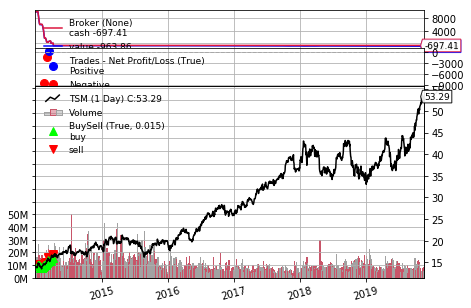

AttributeError: 'Trading_Picture_Generator' object has no attribute 'Short_MovingAverage'

In [12]:
I_Am_Trading_Instance = Trading_Picture_Generator("TSM", 1000, datetime(2014,1,1), datetime(2019,11,16))
I_Am_Trading_Instance.Function_RunTrading_KD(10)
I_Am_Trading_Instance.Function_Plotting_KD()